# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




622

In [3]:
response_test = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=London").json()
print(json.dumps(response_test, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1613044715,
    "id": 2643743,
    "main": {
        "feels_like": 265.23,
        "humidity": 69,
        "pressure": 1029,
        "temp": 272.9,
        "temp_max": 273.71,
        "temp_min": 272.04
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1613028113,
        "sunset": 1613063266,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 7.2
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("------------------------------")
counter = 1
lats = []
lngs = []
max_temps = []
humidity = []
cloudiness = []
windspeeds = []
countries = []
dates = []
new_cities_list = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing city #{counter}: {city}")
        counter = counter + 1
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        new_cities_list.append(city)
        
    except:
        print('City not found. Processing next city.')
        
        
        
       
#print(json.dumps(response, indent=4, sort_keys=True))

Beginning Data Retrieval
------------------------------
Processing city #1: punta arenas
Processing city #2: illoqqortoormiut
City not found. Processing next city.
Processing city #3: carnarvon
Processing city #4: dikson
Processing city #5: georgetown
Processing city #6: taolanaro
City not found. Processing next city.
Processing city #7: hobart
Processing city #8: mizpe ramon
City not found. Processing next city.
Processing city #9: albany
Processing city #10: simao
Processing city #11: victoria
Processing city #12: souillac
Processing city #13: saint-philippe
Processing city #14: mataura
Processing city #15: berdigestyakh
Processing city #16: sentyabrskiy
City not found. Processing next city.
Processing city #17: san patricio
Processing city #18: gogrial
Processing city #19: khatanga
Processing city #20: new norfolk
Processing city #21: mill valley
Processing city #22: porto velho
Processing city #23: hudson bay
Processing city #24: ushuaia
Processing city #25: vestmannaeyjar
Processi

Processing city #234: mulchen
Processing city #235: beloha
Processing city #236: flin flon
Processing city #237: bien hoa
Processing city #238: narasannapeta
Processing city #239: oktyabrskoye
Processing city #240: mumford
Processing city #241: sandur
Processing city #242: puerto ayora
Processing city #243: nikolskoye
Processing city #244: sedelnikovo
City not found. Processing next city.
Processing city #245: northam
Processing city #246: upernavik
Processing city #247: havelock
Processing city #248: srandakan
Processing city #249: mabaruma
Processing city #250: codrington
Processing city #251: camacha
Processing city #252: cidreira
Processing city #253: gulshat
City not found. Processing next city.
Processing city #254: yeniseysk
Processing city #255: buenos aires
Processing city #256: pitkyaranta
Processing city #257: nioro
Processing city #258: nepalganj
City not found. Processing next city.
Processing city #259: rabo de peixe
Processing city #260: the valley
Processing city #261: 

Processing city #468: punta alta
Processing city #469: vestmanna
Processing city #470: varhaug
Processing city #471: pandan
Processing city #472: ngunguru
Processing city #473: panguna
Processing city #474: valley station
Processing city #475: tazovskiy
Processing city #476: skelleftea
Processing city #477: gat
Processing city #478: balykshi
Processing city #479: turbat
Processing city #480: yar-sale
Processing city #481: mansoa
Processing city #482: nipawin
Processing city #483: cape coast
Processing city #484: port macquarie
Processing city #485: alamosa
Processing city #486: sri aman
Processing city #487: wembley
Processing city #488: dabola
Processing city #489: kodinsk
Processing city #490: sanguem
Processing city #491: olga
Processing city #492: tura
Processing city #493: saint george
Processing city #494: husavik
Processing city #495: bundaberg
Processing city #496: san quintin
Processing city #497: buala
Processing city #498: paramonga
Processing city #499: livingston
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
print(len(new_cities_list))
print(len(lats))
print(len(lngs))
print(len(max_temps))
print(len(humidity))
print(len(cloudiness))
print(len(windspeeds))
print(len(dates))
#weather_dict = {
  #  'City' : ci
   # 'Lat' : lats
   # ''
# }

564
564
564
564
564
564
564
564


In [8]:
weather_dict = {
    'City' : new_cities_list,
    'Lat' : lats,
    'Lng' : lngs,
    'Max Temp' : max_temps,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : windspeeds,
    'Date' : dates
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('Output/weather_data.csv')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#No cities with humidity over 100% in this sample
weather_df.sort_values(by = 'Humidity', ascending = False)    


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
115,caxias,38.7031,-9.2767,61.00,100,75,12.66,1613048779
184,airai,-8.9266,125.4092,63.41,100,100,0.09,1613048793
97,vaini,-21.2000,-175.2000,77.00,100,20,3.44,1613048776
390,cozumel,20.5083,-86.9458,75.99,100,40,3.44,1613048834
223,mabaruma,8.2000,-59.7833,73.40,100,40,4.45,1613048590
...,...,...,...,...,...,...,...,...
230,nioro,13.3500,-15.7500,102.51,8,100,10.42,1613048802
177,banikoara,11.2985,2.4386,99.37,8,0,7.61,1613048792
298,tougan,13.0667,-3.0667,100.98,7,0,13.49,1613048816
151,djibo,14.1022,-1.6306,98.74,7,0,13.15,1613048786


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Maximum Temperature (02/11/21)')

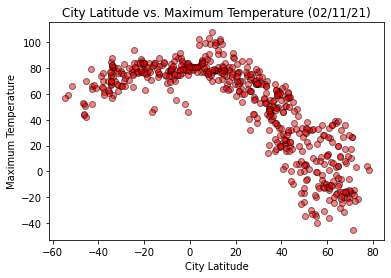

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], color = 'red', alpha = 0.5, edgecolors = 'black')
plt.xlabel('City Latitude')
plt.ylabel('Maximum Temperature')
plt.title('City Latitude vs. Maximum Temperature (02/11/21)')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (02/11/21)')

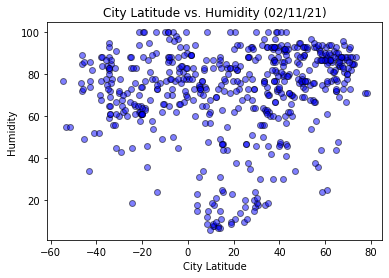

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], color = 'blue', alpha = 0.5, edgecolors = 'black' )
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (02/11/21)')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (02/11/21)')

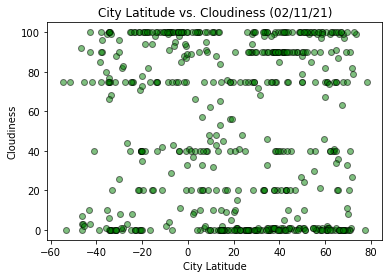

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], color = 'green', alpha = 0.5, edgecolors = 'black' )
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (02/11/21)')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (02/11/21)')

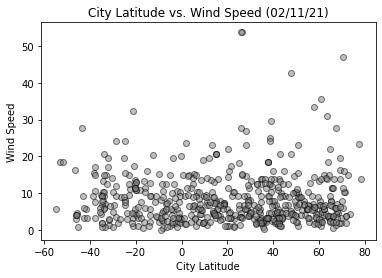

In [14]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], color = 'grey', alpha = 0.5, edgecolors = 'black' )
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (02/11/21)')

## Linear Regression

In [17]:
northern_hemisphere_df = weather_df[weather_df['Lat'] >= 0]
southern_hemisphere_df = weather_df[weather_df['Lat'] < 0]



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,punta arenas,-53.1500,-70.9167,59.00,55,0,18.41,1613048757
1,carnarvon,-24.8667,113.6333,75.20,83,0,24.16,1613048757
4,hobart,-42.8794,147.3294,66.00,77,90,9.22,1613048758
8,souillac,-20.5167,57.5167,84.20,61,40,11.50,1613048759
9,saint-philippe,-21.3585,55.7679,87.01,62,0,32.21,1613048759
...,...,...,...,...,...,...,...,...
546,innisfail,-17.5333,146.0333,77.47,87,82,3.27,1613048864
550,manggar,-2.8833,108.2667,79.27,84,100,8.75,1613048865
556,mendi,-6.1761,143.6513,55.04,96,93,2.39,1613048866
560,manono,-7.3000,27.4167,81.48,78,29,3.78,1613048867


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8695646964041636


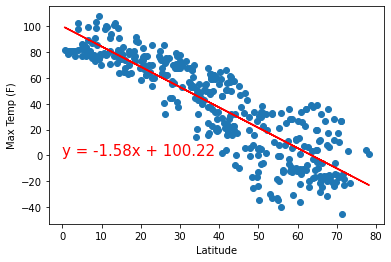

<Figure size 432x288 with 0 Axes>

In [43]:
x_values_latitude = northern_hemisphere_df['Lat']
y_values_max_temp = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_max_temp)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_max_temp)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_maxtemp_northern.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4676575951354789


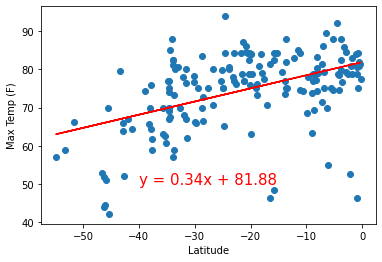

<Figure size 432x288 with 0 Axes>

In [44]:
x_values_latitude = southern_hemisphere_df['Lat']
y_values_max_temp = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_max_temp)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_max_temp)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_maxtemp_southern.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.38423455031218967


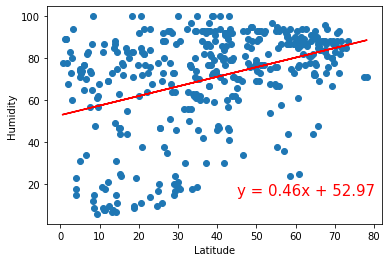

<Figure size 432x288 with 0 Axes>

In [45]:
x_values_latitude = northern_hemisphere_df['Lat']
y_values_humidity = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_humidity)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_humidity)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(45, 15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_humidity_northern.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19543043218385123


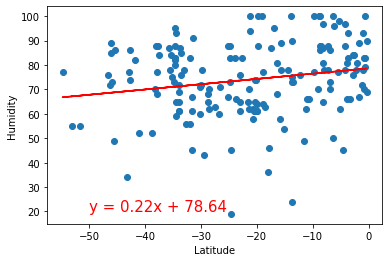

<Figure size 432x288 with 0 Axes>

In [46]:
x_values_latitude = southern_hemisphere_df['Lat']
y_values_humidity = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_humidity)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_humidity)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_humidity_southern.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07570948639098624


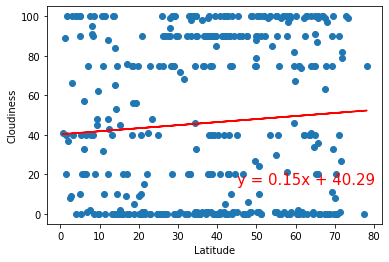

<Figure size 432x288 with 0 Axes>

In [47]:
x_values_latitude = northern_hemisphere_df['Lat']
y_values_cloudiness = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_cloudiness)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_cloudiness)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(45, 15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_cloudiness_northern.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.31162057586827807


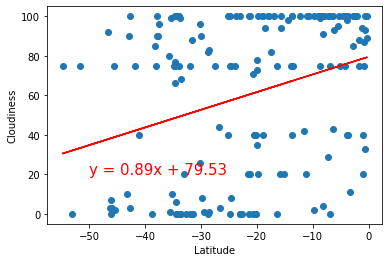

<Figure size 432x288 with 0 Axes>

In [49]:
x_values_latitude = southern_hemisphere_df['Lat']
y_values_cloudiness = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_cloudiness)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_cloudiness)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_cloudiness_southern.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00939625730767832


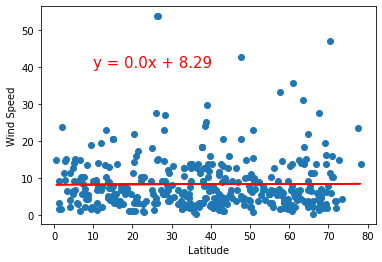

<Figure size 432x288 with 0 Axes>

In [53]:
x_values_latitude = northern_hemisphere_df['Lat']
y_values_windspeed = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_windspeed)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_windspeed)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(10, 40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_cloudiness_southern.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.16682074914693445


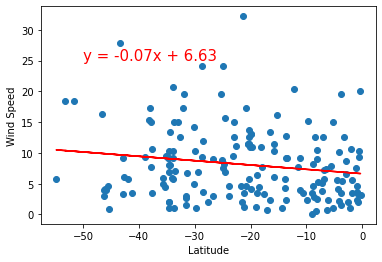

<Figure size 432x288 with 0 Axes>

In [56]:
x_values_latitude = southern_hemisphere_df['Lat']
y_values_windspeed = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_latitude, y_values_windspeed)
regress_values = x_values_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_latitude,y_values_windspeed)
plt.plot(x_values_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig('Output/latitude_cloudiness_southern.png')

Observable Trends:

1. There is a strong trend downward when comparing maximum temperature to latitude in the Northern Hemisphere, but this    trend is inverted when the Southern Hemisphere is observed.
2. There seems to be a small correlation between cloudiness and latitude in the Southern Hemisphere, but very little correlation in the northern hemisphere.
3. It looks as thought here is very little correlation between wind speed and latitude in either hemisphere.